**I. Data upload and normalization**

1. Importing packages and libraries.

In [1]:
import numpy as np
import scipy
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from pybaselines import Baseline
from sklearn.metrics import auc

2. Uploading the data of all lanes.

In [3]:
# Uploading the data of all lanes.

data = pd.read_excel("data/2 T19A + U19U CY5.xlsx")

In [6]:
data

,Distance,Grey_Values_T0,Grey_Values_T10s,Grey_Values_T30s,Grey_Values_T1M,Grey_Values_T3M,Grey_Values_T6M,Grey_Values_T30M,Grey_Values_T100M,Grey_Values_Ladder1,Grey_Values_Ladder2,Height,Width
0,0.00,1196.778,1262.056,1218.056,1210.556,1172.556,1190.611,1211.333,1217.556,1337.944,1517.611,0.18,12.24
1,0.01,1196.889,1257.222,1224.722,1219.444,1179.833,1192.500,1213.444,1224.333,1332.278,1524.944,NaN,NaN
2,0.02,1198.722,1260.611,1230.000,1189.056,1184.778,1192.056,1211.556,1240.333,1325.222,1534.611,NaN,NaN
3,0.03,1198.889,1270.833,1225.389,1180.667,1182.889,1193.556,1203.833,1230.944,1322.278,1554.111,NaN,NaN
4,0.04,1201.833,1277.500,1223.000,1182.833,1183.000,1197.667,1205.500,1221.389,1324.056,1566.333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,12.19,1315.556,1412.778,1343.000,1322.611,1305.000,1321.944,1300.667,1382.278,2744.833,2211.889,NaN,NaN
1220,12.20,1314.389,1389.056,1334.889,1314.167,1303.611,1325.444,1299.000,1390.056,2775.000,2240.500,NaN,NaN
1221,12.21,1317.778,1375.000,1330.278,1316.500,1314.000,1331.167,1303.167,1395.556,2844.944,2267.444,NaN,NaN
1222,12.22,1322.056,1361.167,1325.389,1319.667,1326.944,1332.556,1307.111,1399.722,2887.000,2300.833,NaN,NaN


3. Plotting the initial data.

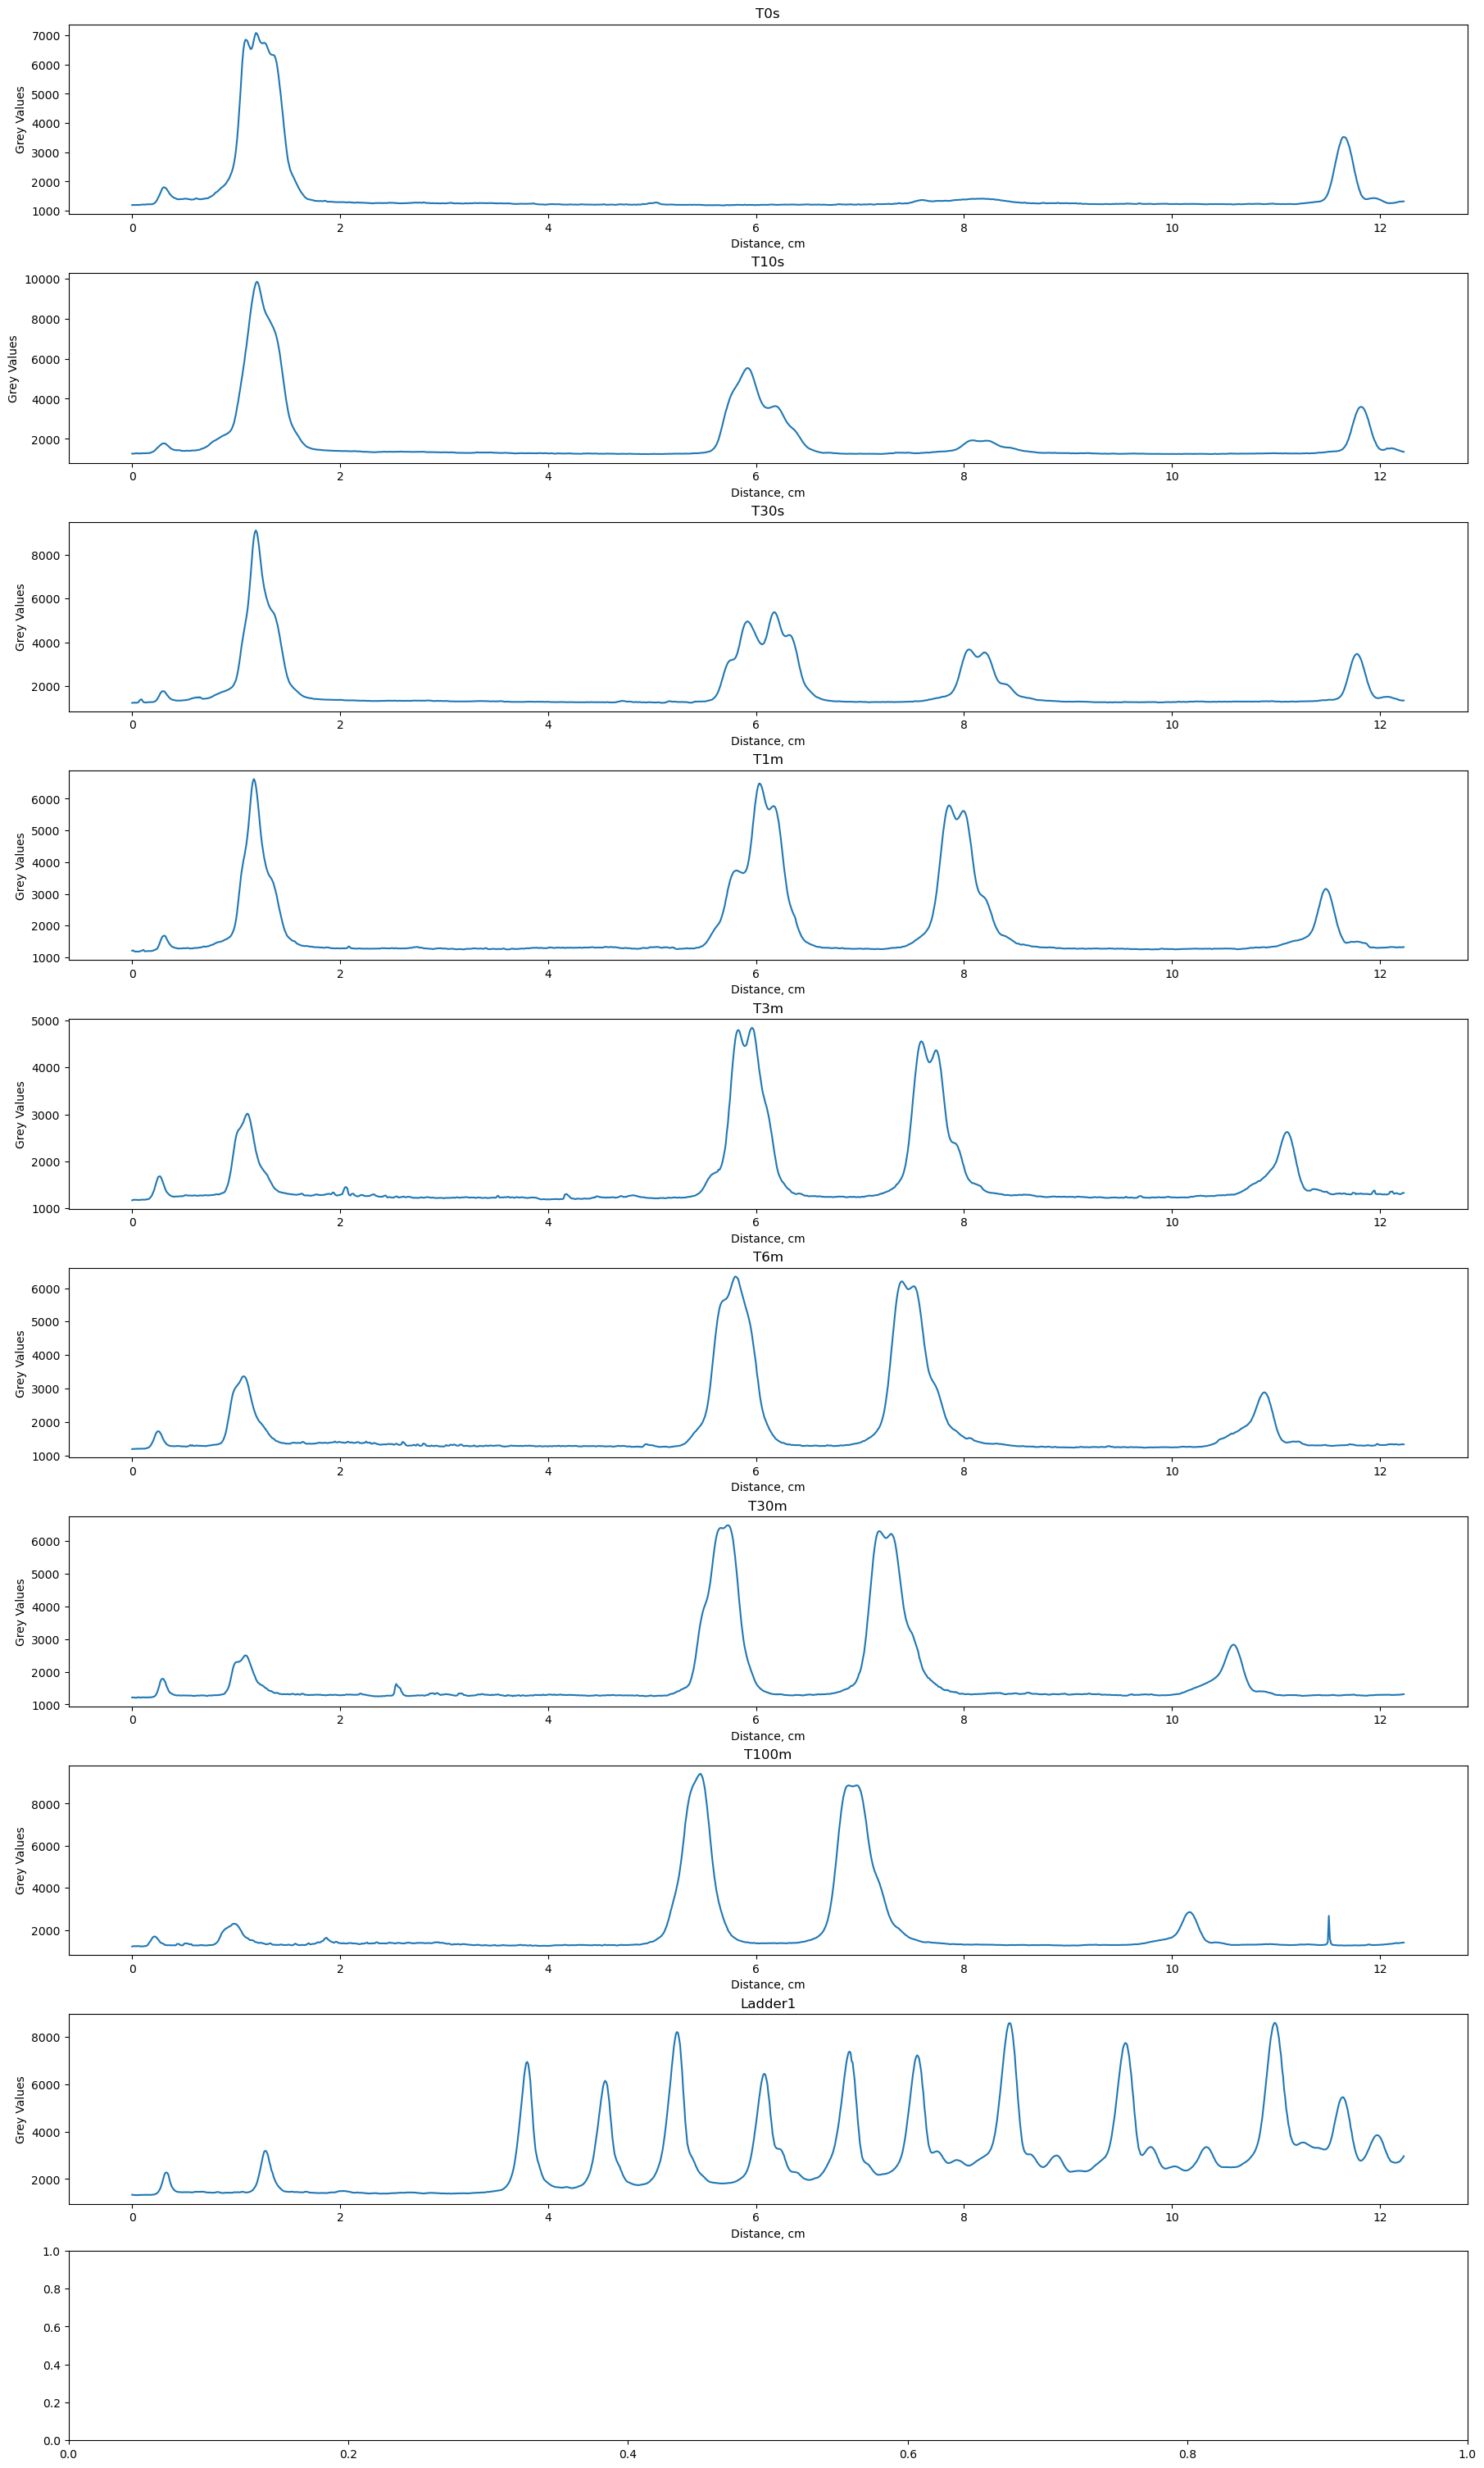

In [9]:
grey_values_list = ["Grey_Values_T0", "Grey_Values_T10s", "Grey_Values_T30s", "Grey_Values_T1M", "Grey_Values_T3M", "Grey_Values_T6M",
                   "Grey_Values_T30M", "Grey_Values_T100M", "Grey_Values_Ladder1"]

# Plotting the initial data 

figure, axis = plt.subplots(nrows=10, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(grey_values_list):
    name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m", "Ladder1", "Ladder2"]
    axis[di].plot(data["Distance"], data[d])
    axis[di].set_title(str(name_list[di])) 
    #axis[di].invert_xaxis()
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

4. Removing the background (baseline adjustment).

In [12]:
for d in data:
    for l in grey_values_list:
        if d == l:
            baseline_fitter = Baseline(x_data=data["Distance"])
            imodpoly = baseline_fitter.imodpoly(data[d], poly_order=3, num_std=0.8)
            new_y = data[d]-imodpoly[0]
            new_y[new_y < 0] = 0
            data[d+"_baseline"] = new_y
       

In [14]:
data

,Distance,Grey_Values_T0,Grey_Values_T10s,Grey_Values_T30s,Grey_Values_T1M,Grey_Values_T3M,Grey_Values_T6M,Grey_Values_T30M,Grey_Values_T100M,Grey_Values_Ladder1,...,Width,Grey_Values_T0_baseline,Grey_Values_T10s_baseline,Grey_Values_T30s_baseline,Grey_Values_T1M_baseline,Grey_Values_T3M_baseline,Grey_Values_T6M_baseline,Grey_Values_T30M_baseline,Grey_Values_T100M_baseline,Grey_Values_Ladder1_baseline
0,0.00,1196.778,1262.056,1218.056,1210.556,1172.556,1190.611,1211.333,1217.556,1337.944,...,12.24,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.01,1196.889,1257.222,1224.722,1219.444,1179.833,1192.500,1213.444,1224.333,1332.278,...,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.02,1198.722,1260.611,1230.000,1189.056,1184.778,1192.056,1211.556,1240.333,1325.222,...,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.03,1198.889,1270.833,1225.389,1180.667,1182.889,1193.556,1203.833,1230.944,1322.278,...,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.04,1201.833,1277.500,1223.000,1182.833,1183.000,1197.667,1205.500,1221.389,1324.056,...,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,12.19,1315.556,1412.778,1343.000,1322.611,1305.000,1321.944,1300.667,1382.278,2744.833,...,NaN,25.799288,95.269911,5.67466,4.224258,0.000000,0.000000,24.235076,88.945797,0.000000
1220,12.20,1314.389,1389.056,1334.889,1314.167,1303.611,1325.444,1299.000,1390.056,2775.000,...,NaN,24.279723,71.209267,0.00000,0.000000,0.000000,1.663770,22.771501,96.766179,0.000000
1221,12.21,1317.778,1375.000,1330.278,1316.500,1314.000,1331.167,1303.167,1395.556,2844.944,...,NaN,27.315188,56.813586,0.00000,0.000000,0.000000,6.967321,27.142625,102.308630,37.280819
1222,12.22,1322.056,1361.167,1325.389,1319.667,1326.944,1332.556,1307.111,1399.722,2887.000,...,NaN,31.238681,42.639867,0.00000,0.398958,5.717181,7.935264,31.291449,106.517153,79.706140


In [16]:
grey_values_baseline_adj_list = []

for d in grey_values_list:
    d = d+"_baseline"
    grey_values_baseline_adj_list.append(d)

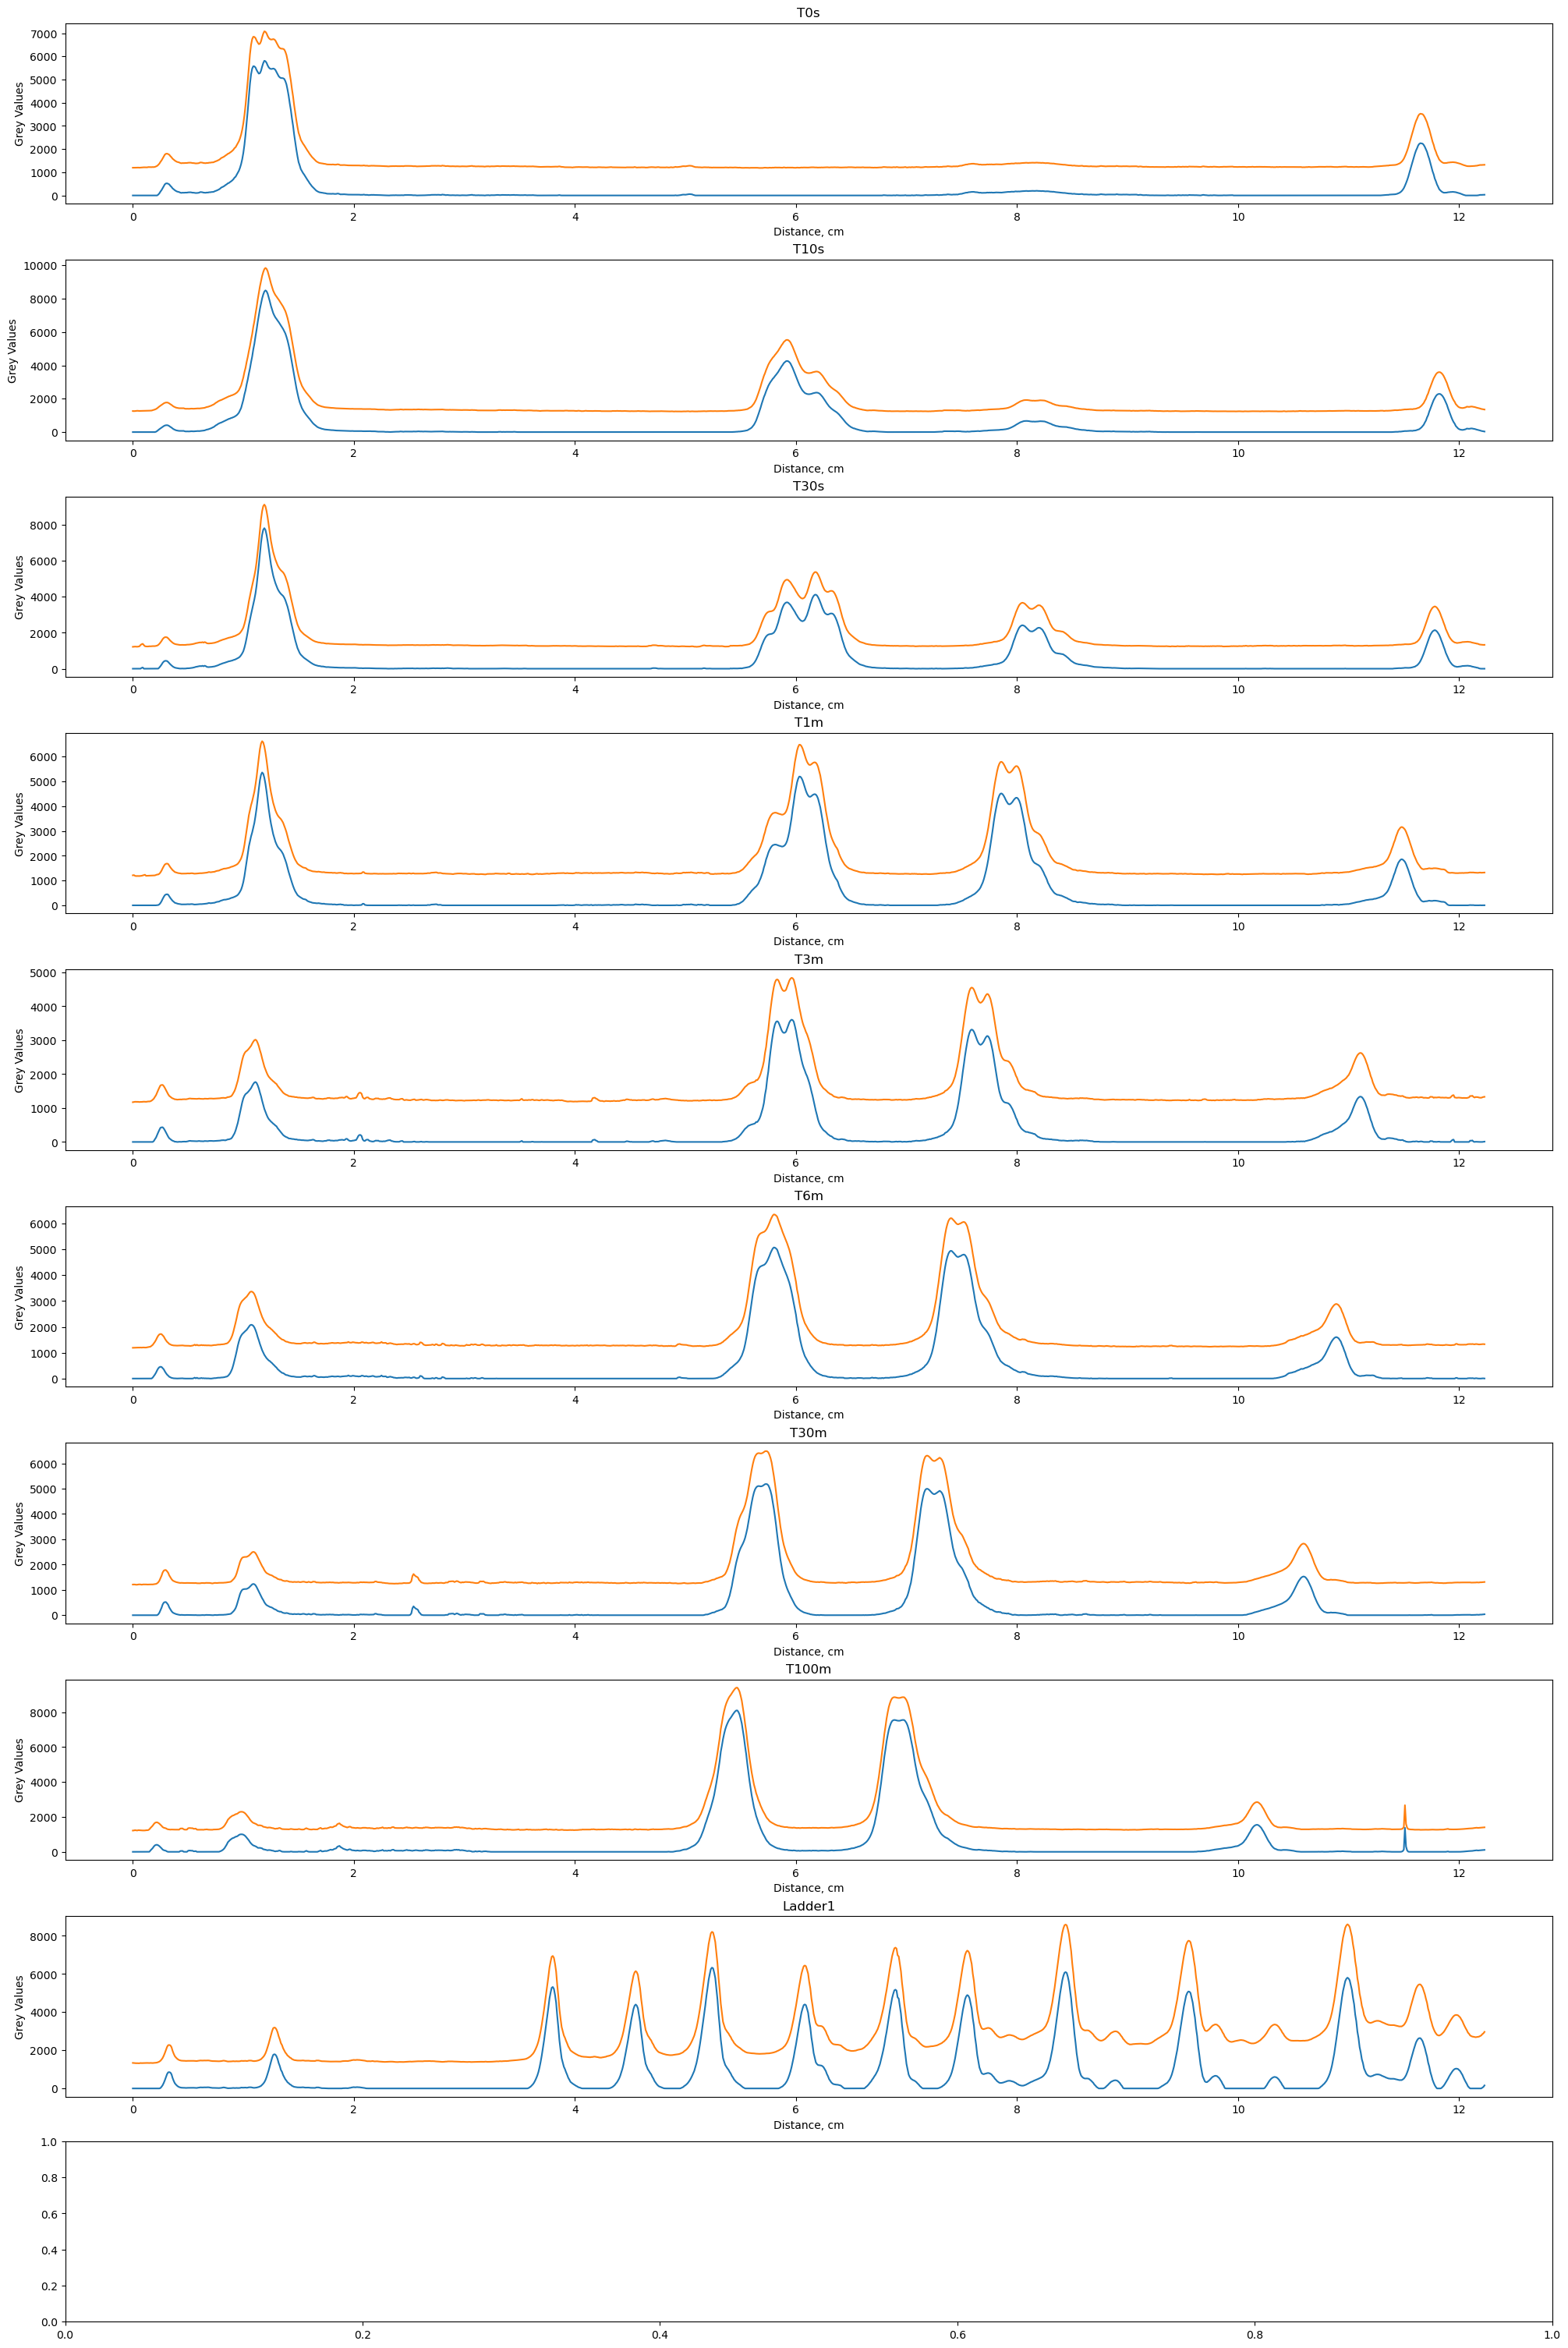

In [18]:
# Plotting the data with adjusted baseline and initial data

figure, axis = plt.subplots(nrows=10, figsize=(20, 30), constrained_layout=True)

for di, d in enumerate(grey_values_baseline_adj_list):
    name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m", "Ladder1", "Ladder2"]
    axis[di].plot(data["Distance"], data[d])
    axis[di].plot(data["Distance"], data[grey_values_list[di]])
    axis[di].set_title(str(name_list[di])) 
    #axis[di].invert_xaxis()
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

5. Normalizing the distance in each lane.

In [21]:
#Finding peak values:

peaks_list = []

for di, d in enumerate(grey_values_baseline_adj_list):
    peaks, values = find_peaks(data[d], height=200)
    peak_values = data.iloc[peaks, 0]
    peak_values = list(peak_values)
    peak_data = (peak_values)
    peaks_list.append(peak_data)
    print(peak_data)


[0.31, 1.09, 1.19, 1.27, 8.18, 11.65]
[0.31, 1.2, 5.92, 6.19, 8.09, 8.15, 8.21, 11.82, 12.07, 12.11]
[0.3, 1.19, 5.92, 6.18, 6.32, 8.05, 8.2, 11.78]
[0.31, 1.17, 5.81, 6.03, 6.17, 7.86, 8.0, 11.48]
[0.27, 1.11, 2.05, 5.64, 5.83, 5.96, 7.59, 7.73, 8.09, 10.83, 11.11]
[0.25, 1.07, 5.8, 7.4, 7.52, 8.05, 10.57, 10.89]
[0.29, 1.09, 2.54, 5.66, 5.73, 7.19, 7.3, 7.77, 10.59]
[0.22, 0.98, 1.15, 1.87, 5.46, 6.89, 6.97, 9.88, 10.17, 11.51]
[0.33, 1.28, 3.8, 4.55, 5.24, 6.08, 6.9, 7.55, 7.74, 7.93, 8.44, 8.63, 8.89, 9.55, 9.79, 10.33, 10.99, 11.26, 11.4, 11.47, 11.64, 11.97]


In [23]:
min_max_list = []

for i in peaks_list:
    min_peak = i[0]
    max_peak = i[-1]
    min_max = list((min_peak, max_peak))
    min_max_list.append(min_max)

In [25]:
# Normalizing the distance

norm_list = []
name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m", "Ladder1", "Ladder2"]

for i, n in min_max_list:
    norm_distance = ((data["Distance"] - i) / (n - i))
    norm_list.append(norm_distance)

for i, n in enumerate(norm_list):
    data[name_list[i]+"_norm_distance"] = n
    
data

,Distance,Grey_Values_T0,Grey_Values_T10s,Grey_Values_T30s,Grey_Values_T1M,Grey_Values_T3M,Grey_Values_T6M,Grey_Values_T30M,Grey_Values_T100M,Grey_Values_Ladder1,...,Grey_Values_Ladder1_baseline,T0s_norm_distance,T10s_norm_distance,T30s_norm_distance,T1m_norm_distance,T3m_norm_distance,T6m_norm_distance,T30m_norm_distance,T100m_norm_distance,Ladder1_norm_distance
0,0.00,1196.778,1262.056,1218.056,1210.556,1172.556,1190.611,1211.333,1217.556,1337.944,...,0.000000,-0.027337,-0.026271,-0.026132,-0.027753,-0.024908,-0.023496,-0.028155,-0.019486,-0.028351
1,0.01,1196.889,1257.222,1224.722,1219.444,1179.833,1192.500,1213.444,1224.333,1332.278,...,0.000000,-0.026455,-0.025424,-0.025261,-0.026858,-0.023985,-0.022556,-0.027184,-0.018601,-0.027491
2,0.02,1198.722,1260.611,1230.000,1189.056,1184.778,1192.056,1211.556,1240.333,1325.222,...,0.000000,-0.025573,-0.024576,-0.024390,-0.025962,-0.023063,-0.021617,-0.026214,-0.017715,-0.026632
3,0.03,1198.889,1270.833,1225.389,1180.667,1182.889,1193.556,1203.833,1230.944,1322.278,...,0.000000,-0.024691,-0.023729,-0.023519,-0.025067,-0.022140,-0.020677,-0.025243,-0.016829,-0.025773
4,0.04,1201.833,1277.500,1223.000,1182.833,1183.000,1197.667,1205.500,1221.389,1324.056,...,0.000000,-0.023810,-0.022881,-0.022648,-0.024172,-0.021218,-0.019737,-0.024272,-0.015943,-0.024914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,12.19,1315.556,1412.778,1343.000,1322.611,1305.000,1321.944,1300.667,1382.278,2744.833,...,0.000000,1.047619,1.006780,1.035714,1.063563,1.099631,1.122180,1.155340,1.060230,1.018900
1220,12.20,1314.389,1389.056,1334.889,1314.167,1303.611,1325.444,1299.000,1390.056,2775.000,...,0.000000,1.048501,1.007627,1.036585,1.064458,1.100554,1.123120,1.156311,1.061116,1.019759
1221,12.21,1317.778,1375.000,1330.278,1316.500,1314.000,1331.167,1303.167,1395.556,2844.944,...,37.280819,1.049383,1.008475,1.037456,1.065354,1.101476,1.124060,1.157282,1.062002,1.020619
1222,12.22,1322.056,1361.167,1325.389,1319.667,1326.944,1332.556,1307.111,1399.722,2887.000,...,79.706140,1.050265,1.009322,1.038328,1.066249,1.102399,1.125000,1.158252,1.062888,1.021478


In [27]:
distance_norm_list = []

for n in name_list:
    n = n+"_norm_distance"
    distance_norm_list.append(n)

6. Plotting the 0-1 normalized data.

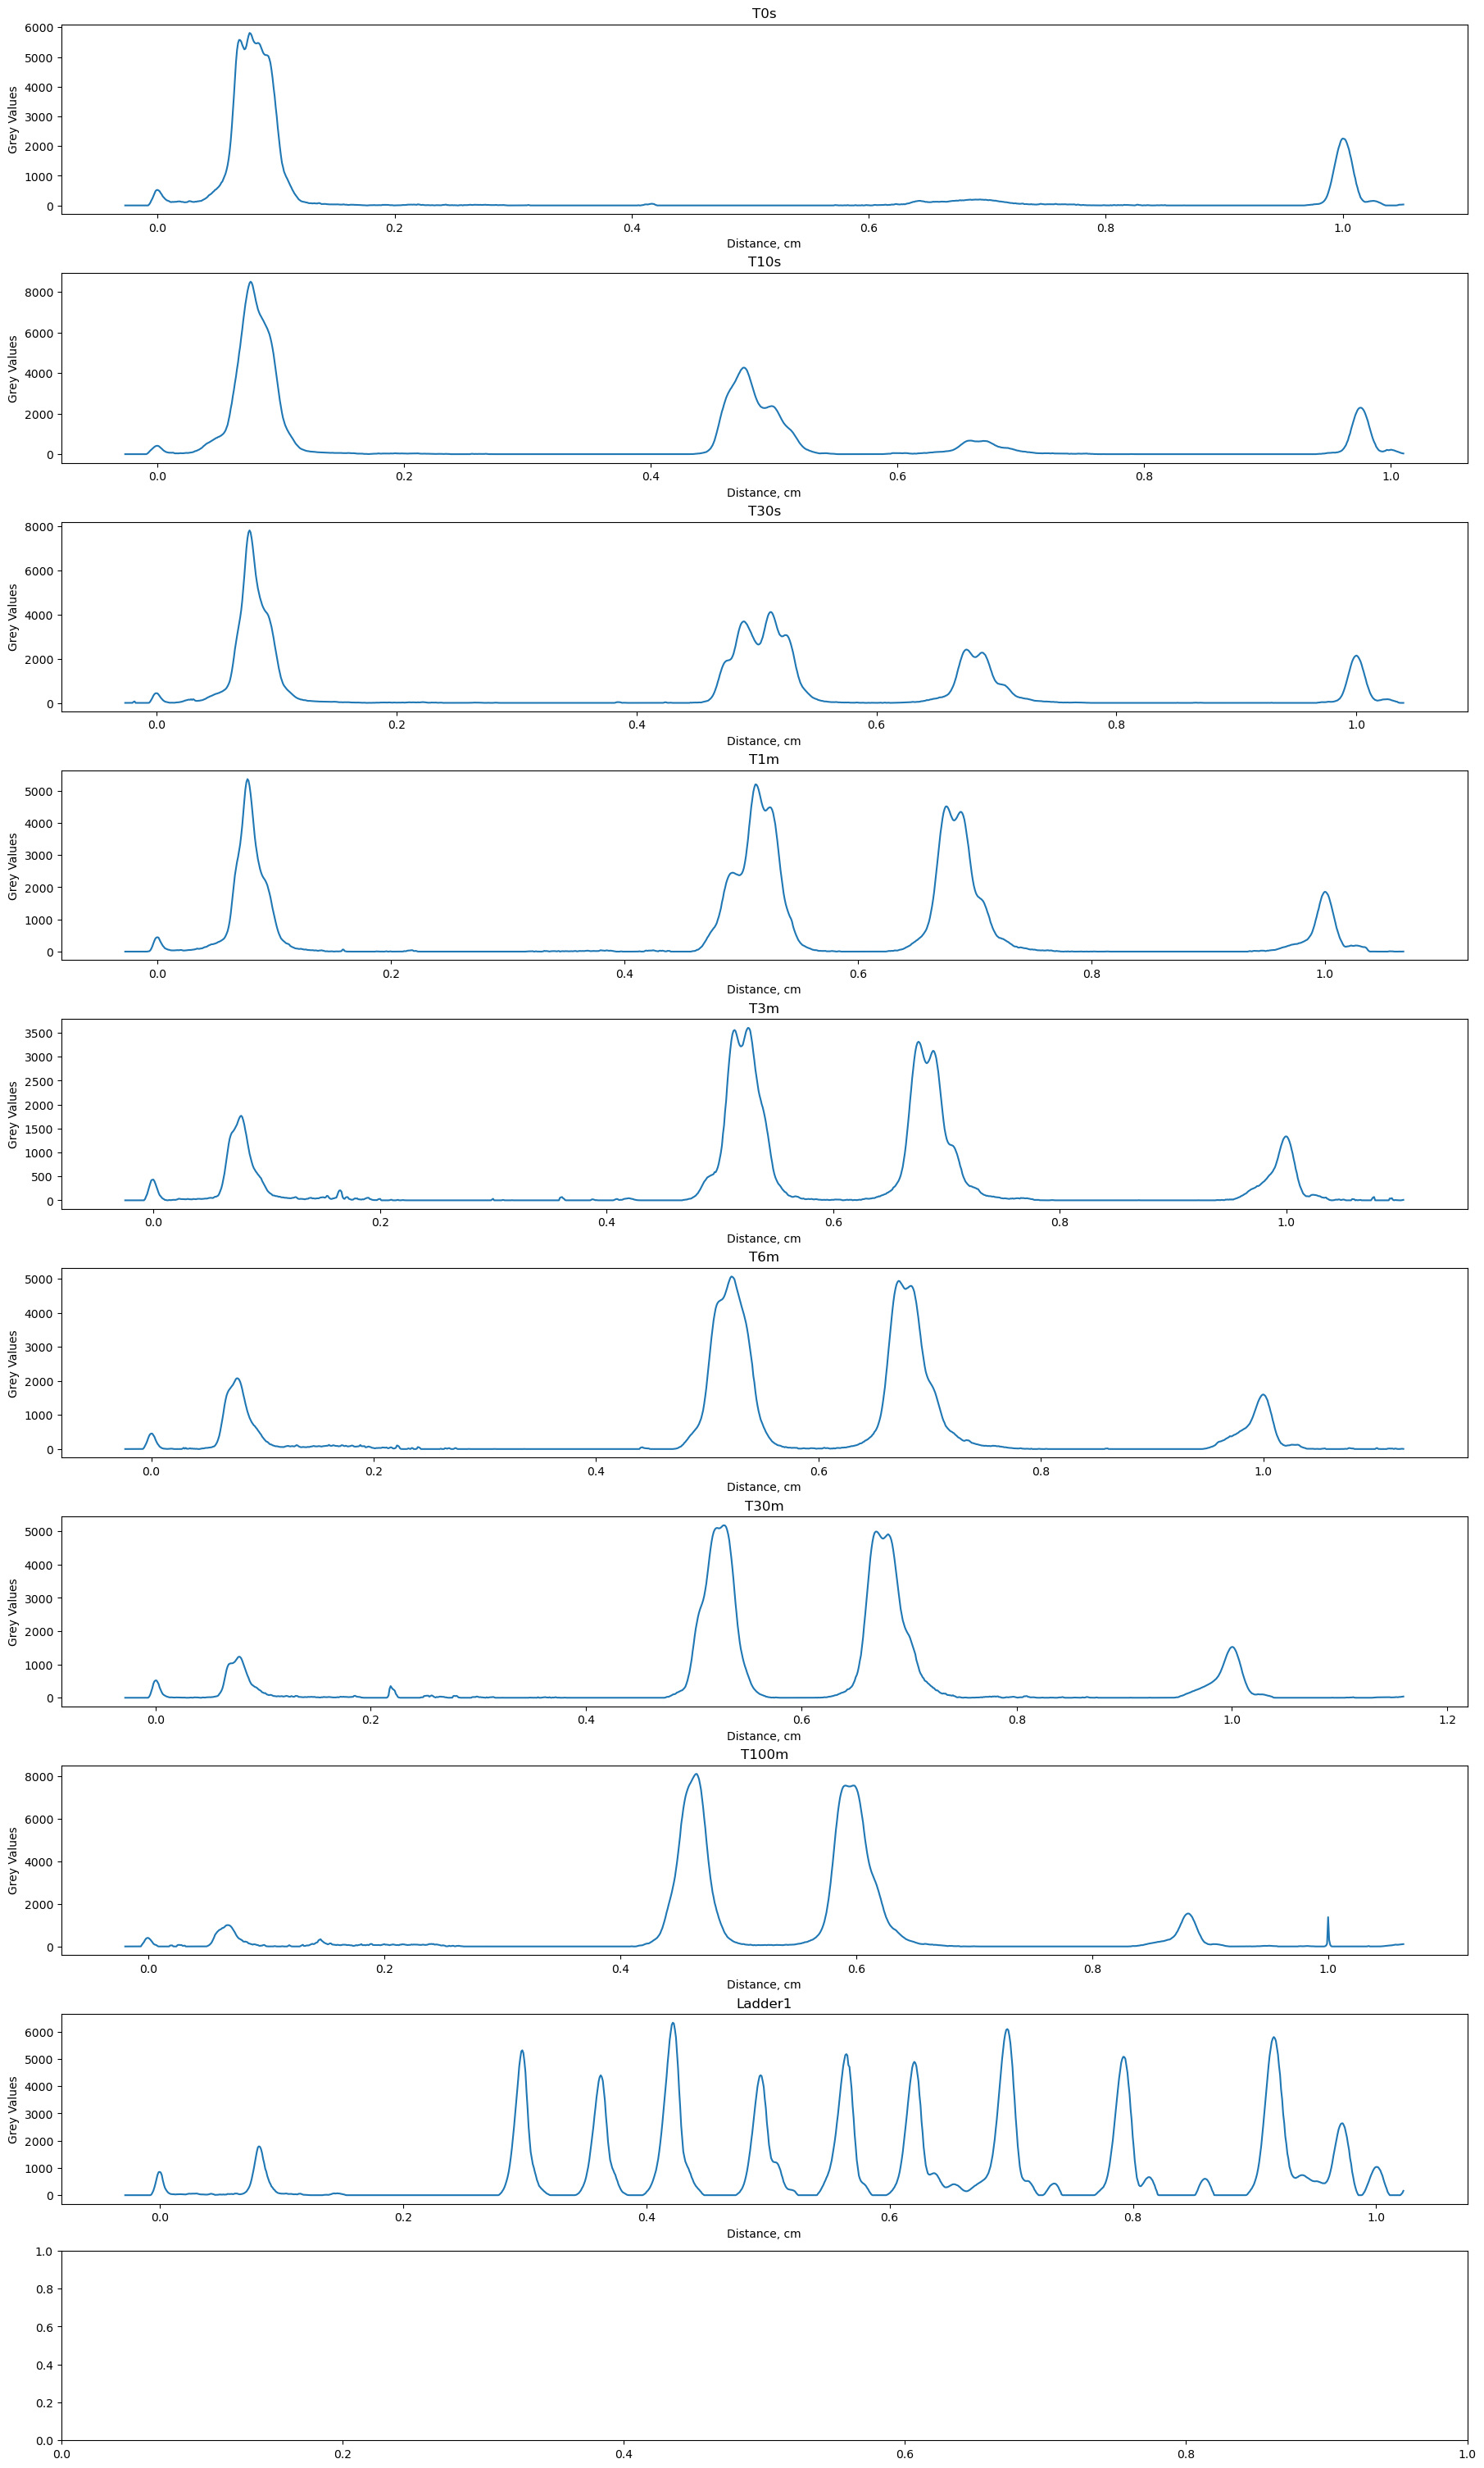

In [30]:
# Plotting the data with normalized distance

figure, axis = plt.subplots(nrows=10, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(grey_values_baseline_adj_list):
    axis[di].plot(data[distance_norm_list[di]], data[d])
    axis[di].set_title(str(name_list[di])) 
    #axis[di].invert_xaxis()
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

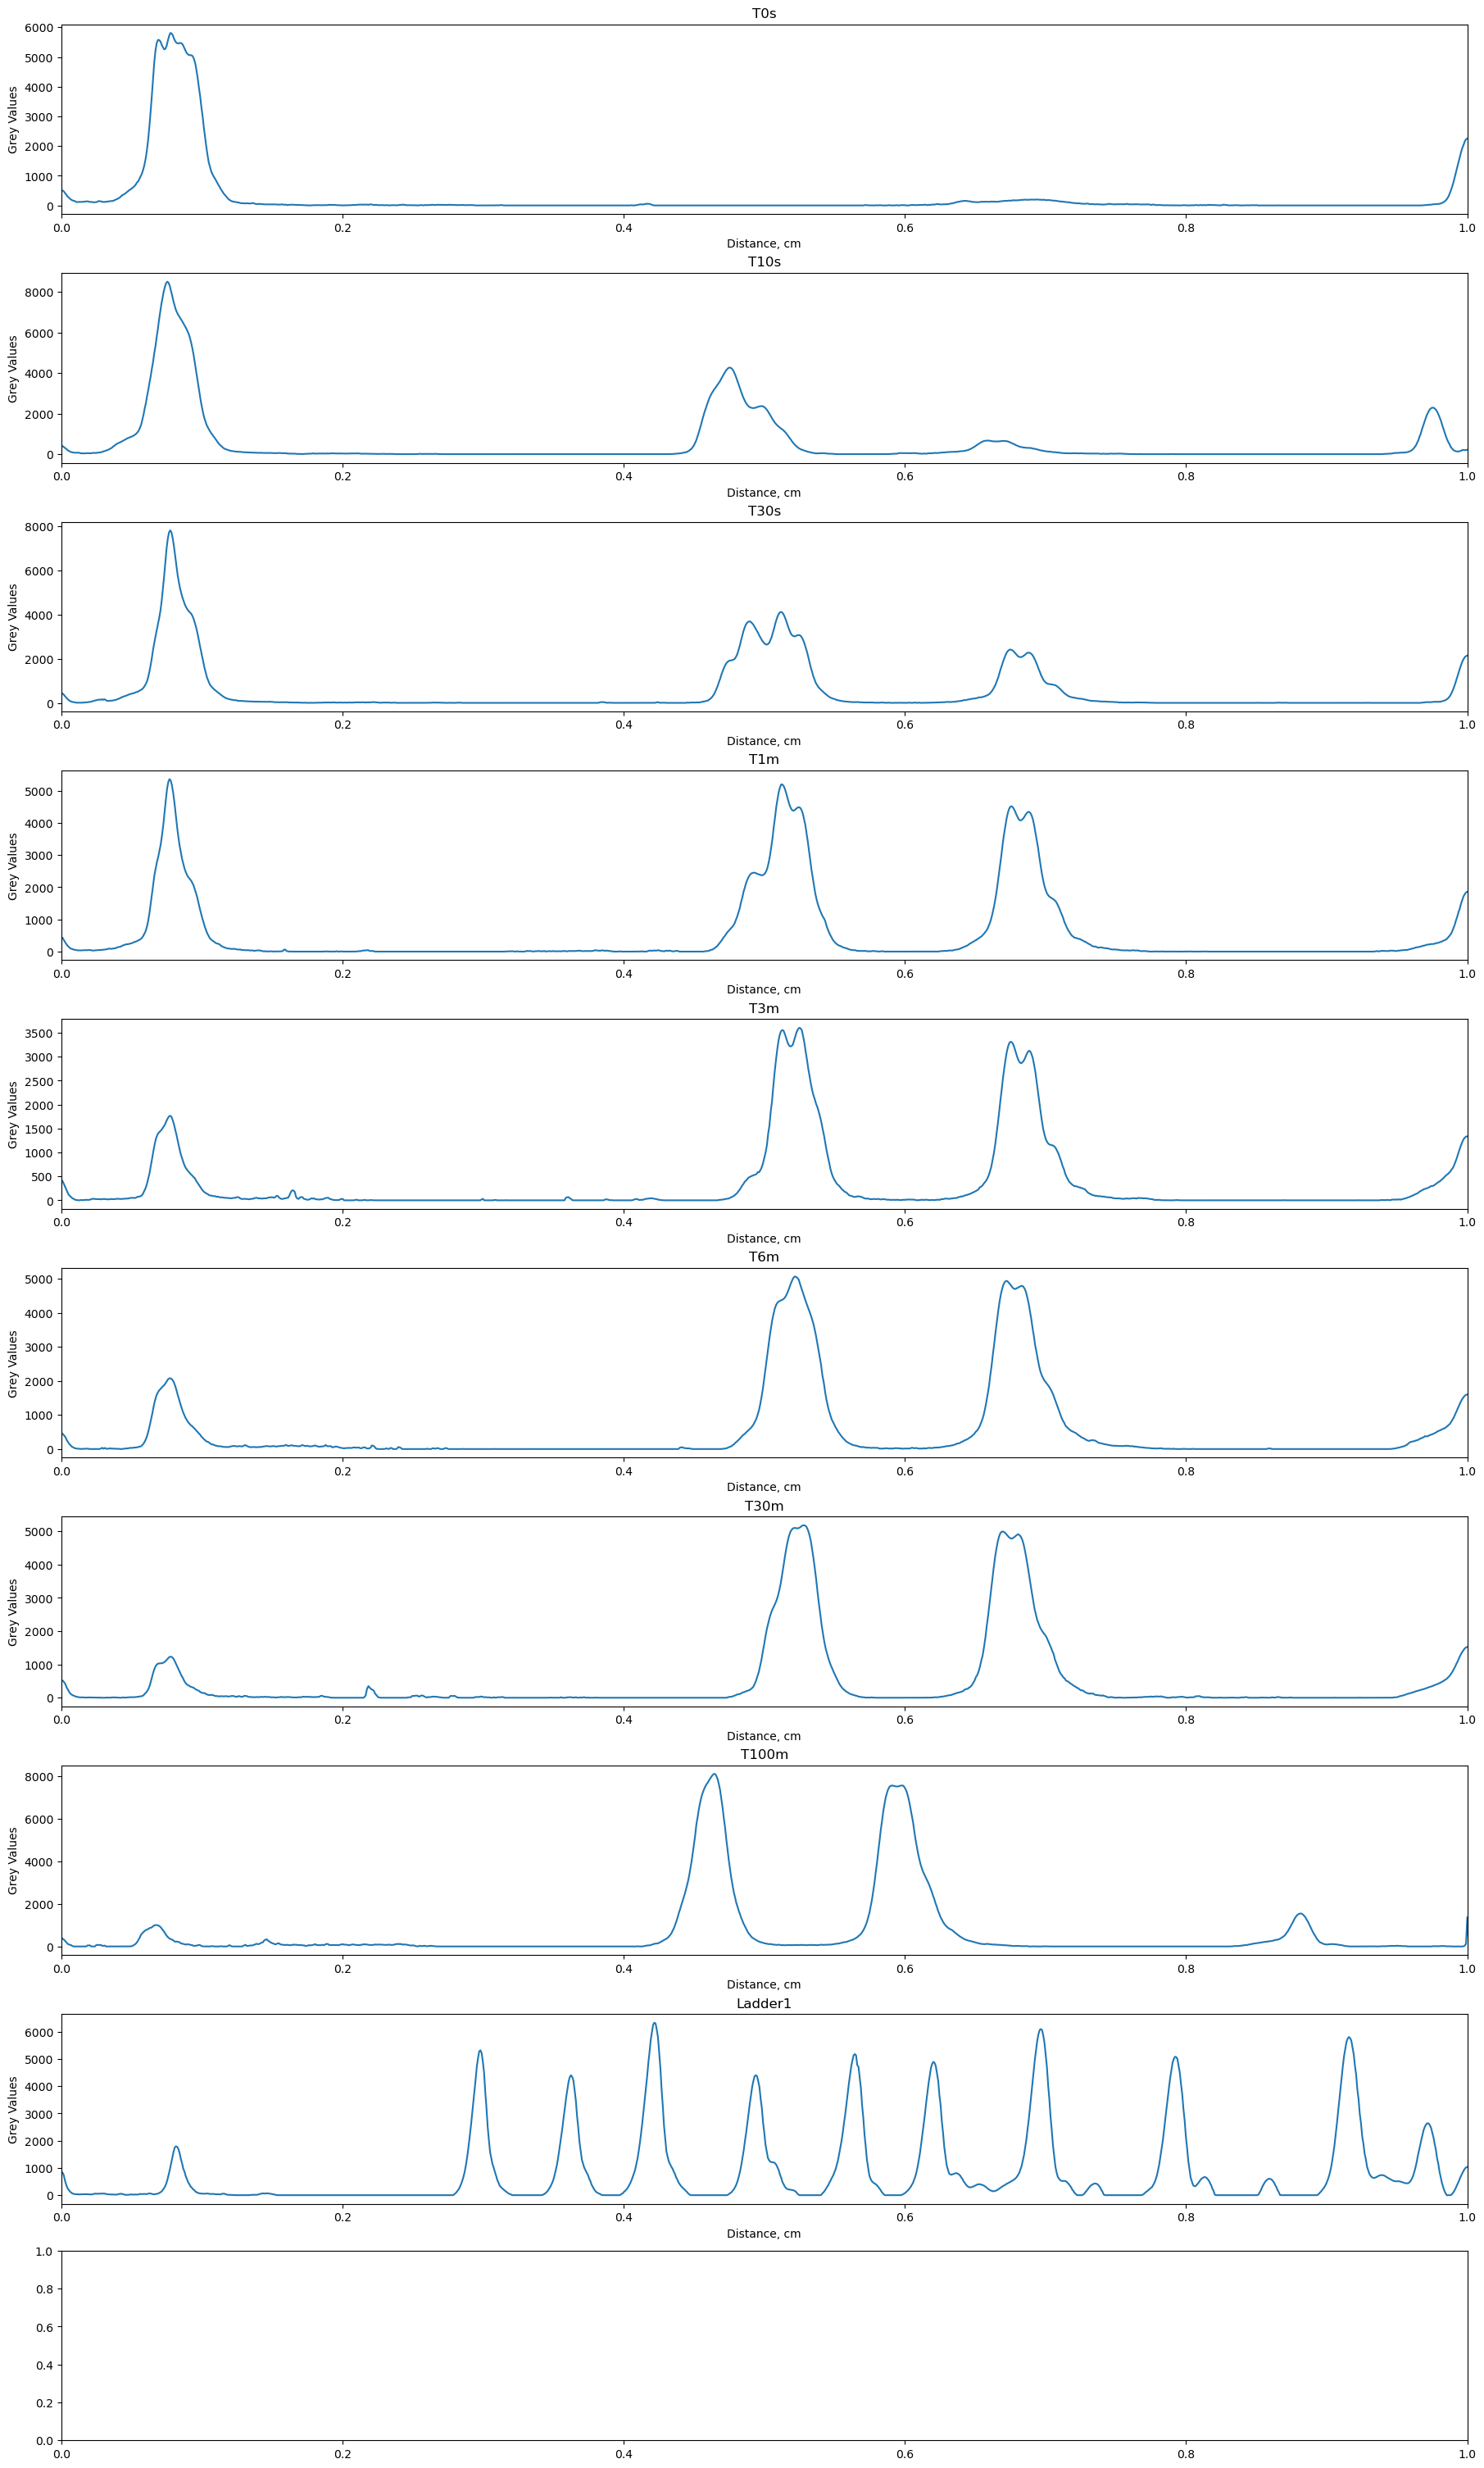

In [32]:
# Plotting the data with normalized distance from 0 to 1

figure, axis = plt.subplots(nrows=10, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(grey_values_baseline_adj_list):
    axis[di].plot(data[distance_norm_list[di]], data[d])
    axis[di].set_title(str(name_list[di])) 
    axis[di].set_xlim(0, 1)
    #axis[di].invert_xaxis()
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")
    

**3. AUC**

1. Grouping

In [36]:
data_t0s = data[['Distance', "Grey_Values_T0_baseline"]]
data_t10s = data[['Distance', "Grey_Values_T10s_baseline"]]
data_t30s = data [['Distance', "Grey_Values_T30s_baseline"]]
data_t1m = data[['Distance', "Grey_Values_T1M_baseline"]]
data_t3m = data[['Distance', "Grey_Values_T3M_baseline"]]
data_t6m = data[['Distance', "Grey_Values_T6M_baseline"]]
data_t30m = data[['Distance', "Grey_Values_T30M_baseline"]]
data_t100m = data[['Distance', "Grey_Values_T100M_baseline"]]

In [38]:
data_list = [data_t0s, data_t10s, data_t30s, data_t1m, data_t3m, data_t6m, data_t30m, data_t100m]

Total area

In [41]:
# Selecting area for the analysis

#This will be changed.
x01 = 55
x02 = 1000

data_cutpeak_list_total = []

for d in data_list:
    d = d[x01:x02]
    data_cutpeak_list_total.append(d)

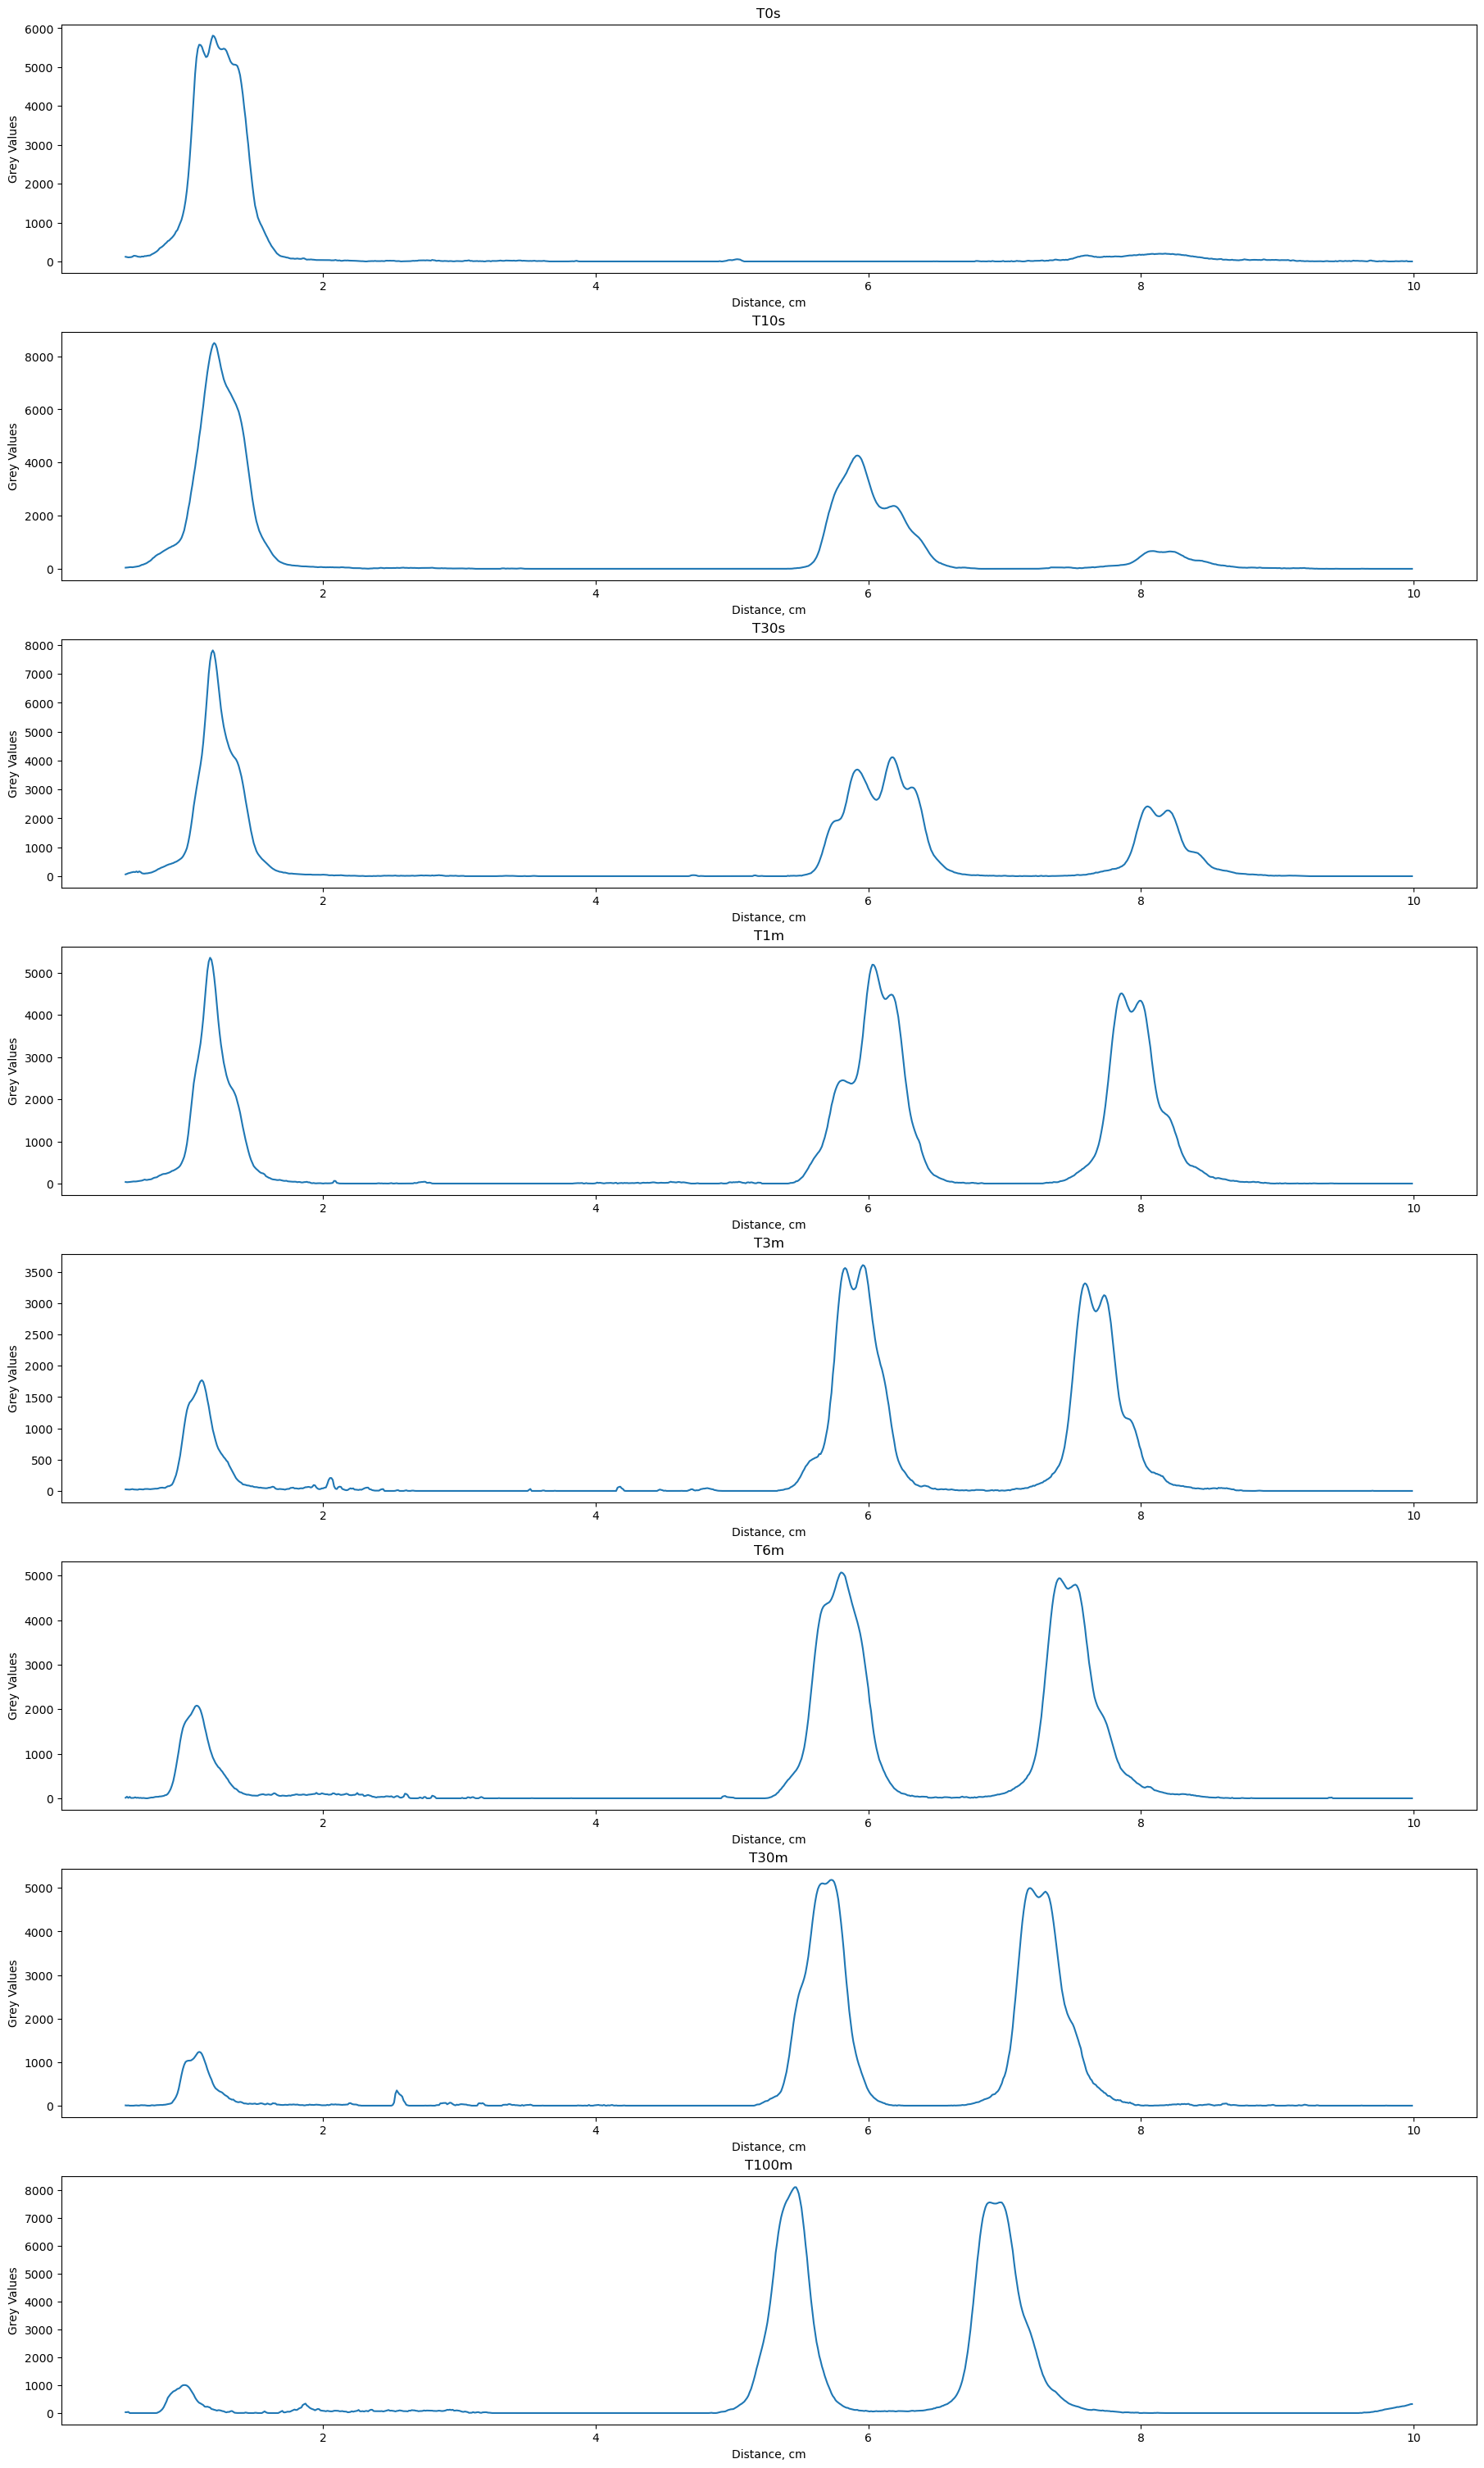

In [43]:
# Plotting the initial data with normalized distance

figure, axis = plt.subplots(nrows=8, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(data_cutpeak_list_total):
    name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m"]
    axis[di].plot(d.iloc[:, 0], d.iloc[:, 1])
    axis[di].set_title(str(name_list[di])) 
    #axis[di].invert_xaxis()
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

2. Selecting substrate area based on t0s.

In [45]:
# Selecting area for the analysis

#This will be changed.
x1 = 70
x2 = 200

data_cutpeak_list1 = []

for d in data_list:
    d = d[x1:x2]
    data_cutpeak_list1.append(d)
 

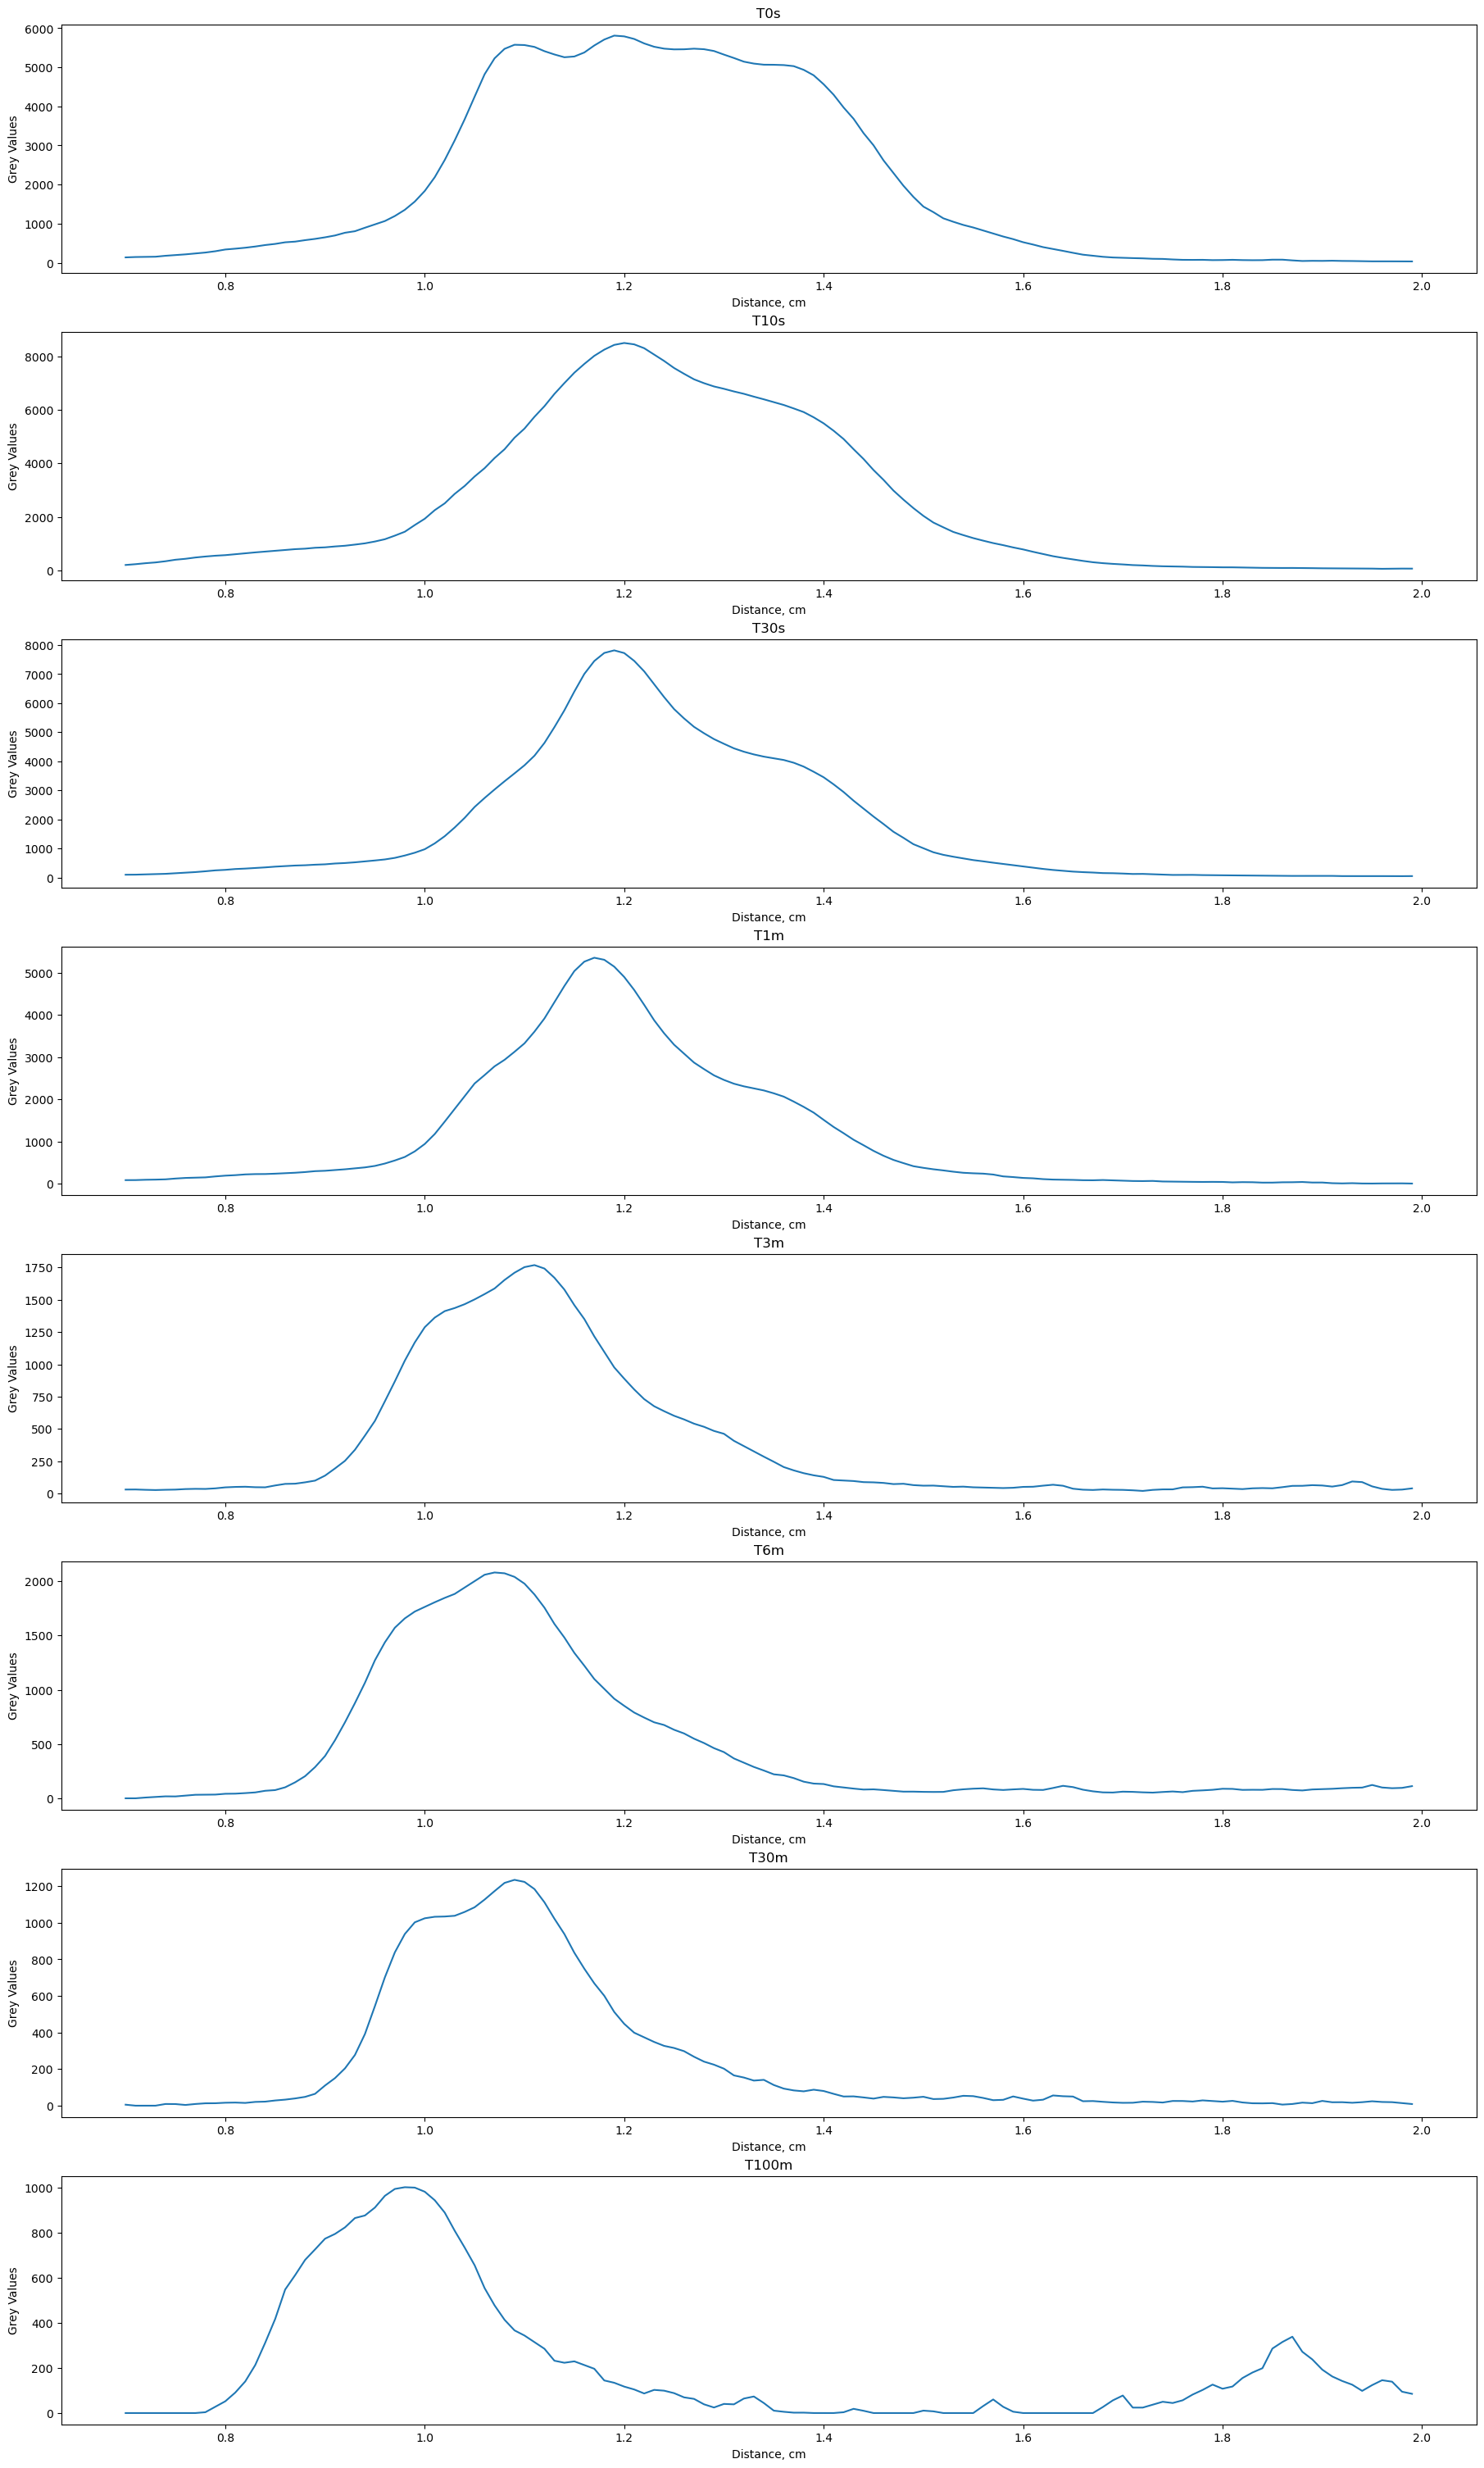

In [48]:
# Substrate

figure, axis = plt.subplots(nrows=8, figsize=(18, 30), constrained_layout=True)

for di, d in enumerate(data_cutpeak_list1):
    name_list = ["T0s", "T10s", "T30s", "T1m", "T3m", "T6m", "T30m", "T100m"]
    axis[di].plot(d.iloc[:, 0], d.iloc[:, 1])
    axis[di].set_title(str(name_list[di])) 
    #axis[di].invert_xaxis()
    axis[di].set(xlabel="Distance, cm", ylabel="Grey Values")

In [50]:
# Getting the area under the curve of substrate in each lane

auc_substrate_list = []

for d in data_list:
    d_auc = auc(d.iloc[x1:x2, 0], d.iloc[x1:x2,1])
    d_auc = d_auc/2
    d_auc = round(d_auc, 3)
    auc_substrate_list.append(d_auc)
    
auc_substrate_list

[1311.704, 1636.294, 1149.602, 729.214, 243.457, 300.528, 158.634, 137.199]

In [52]:
# Getting the total area under the curve in each lane

auc_total_area_list  = []

for d in data_list:
    d_auc_total = auc(d.iloc[x01:x02, 0], d.iloc[x01:x02,1])
    d_auc_total = round(d_auc_total, 3)
    auc_total_area_list.append(d_auc_total)
    
auc_total_area_list 

[2863.282, 5752.266, 5718.758, 5765.55, 3329.834, 4935.77, 4342.564, 6363.825]

In [54]:
# Getting the percentage of substrate in each lane compared to total
auc_percent_of_total_substrate_list = []

for i in range(len(auc_substrate_list)):
    auc_percent_of_total = auc_substrate_list[i]/auc_total_area_list[i]
    auc_percent_of_total = round(auc_percent_of_total, 3)
    auc_percent_of_total_substrate_list.append(auc_percent_of_total)

auc_percent_of_total_substrate_list

[0.458, 0.284, 0.201, 0.126, 0.073, 0.061, 0.037, 0.022]

In [56]:
#auc_percent_of_total_substrate_list[0] =  1
auc_percent_of_total_substrate_list[-1] =  0
time_points = [0, 10, 30, 60, 180, 360, 1800, 6000]
time = pd.DataFrame(time_points, columns=["Time_Points"])
auc_sub = pd.DataFrame(auc_percent_of_total_substrate_list, columns=["Substrate"])
df_sub = pd.concat([time, auc_sub], axis=1)
df_sub

,Time_Points,Substrate
0,0,0.458
1,10,0.284
2,30,0.201
3,60,0.126
4,180,0.073
5,360,0.061
6,1800,0.037
7,6000,0.000


In [64]:
# Initialize the normalized data list for the substrate
d1 = auc_percent_of_total_substrate_list 
substrate_data_norm = (d1 - np.min(d1)) / (np.max(d1) - np.min(d1))
df_sub["Substrate_norm"] = substrate_data_norm

df_sub

,Time_Points,Substrate,Substrate_norm
0,0,0.458,1.000000
1,10,0.284,0.620087
2,30,0.201,0.438865
3,60,0.126,0.275109
4,180,0.073,0.159389
5,360,0.061,0.133188
6,1800,0.037,0.080786
7,6000,0.000,0.000000


In [60]:
df_sub.to_csv('resuls.csv', encoding='utf-8', index = False, header = True)